Extracting EDF parameters from c:\Users\Admin\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\emotion_data\103918\103918.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Not setting metadata
374 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 374 events and 385 original time points ...
0 bad epochs dropped


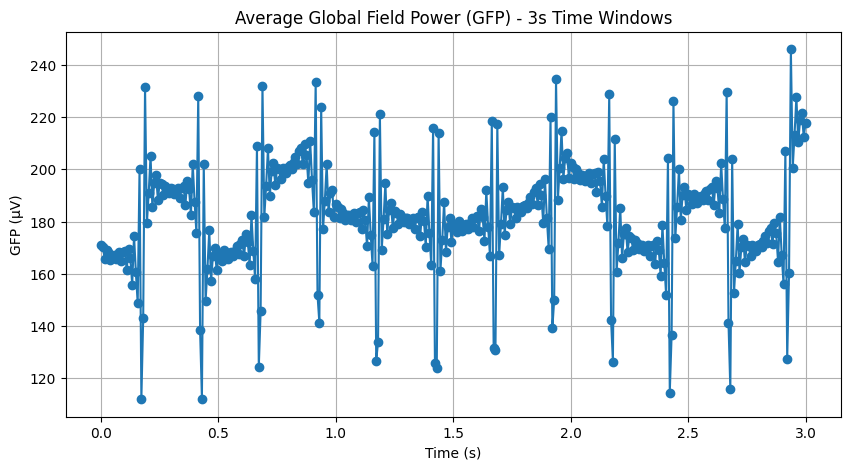

In [1]:
import mne
import matplotlib.pyplot as plt

# Load the EDF file
file_path = 'emotion_data/103918/103918.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)

# Filter the data (optional)
raw.filter(l_freq=1., h_freq=40.)

# Define the time window (30 seconds)
window_length = 3  # in seconds

# Create events for fixed-length epochs
events = mne.make_fixed_length_events(raw, id=1, start=0, stop=raw.times[-1], duration=window_length)
epochs = mne.Epochs(raw, events, tmin=0, tmax=window_length, baseline=None, detrend=1, preload=True)

# Compute the GFP for each time point across epochs
gfp = epochs.get_data().std(axis=1)  # Standard deviation across channels for each epoch

# Calculate the mean GFP across epochs
mean_gfp = gfp.mean(axis=0)  # Average GFP over all epochs

# The time vector corresponding to the GFP
times = epochs.times  # Time points within each epoch

# Plotting the mean GFP against the time points
plt.figure(figsize=(10, 5))
plt.plot(times, mean_gfp, marker='o', linestyle='-')  # Match times to mean_gfp
plt.title(f'Average Global Field Power (GFP) - {window_length}s Time Windows')
plt.xlabel('Time (s)')
plt.ylabel('GFP (μV)')
plt.grid()
plt.show()


Extracting EDF parameters from c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\emotion_data\103918\103918.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


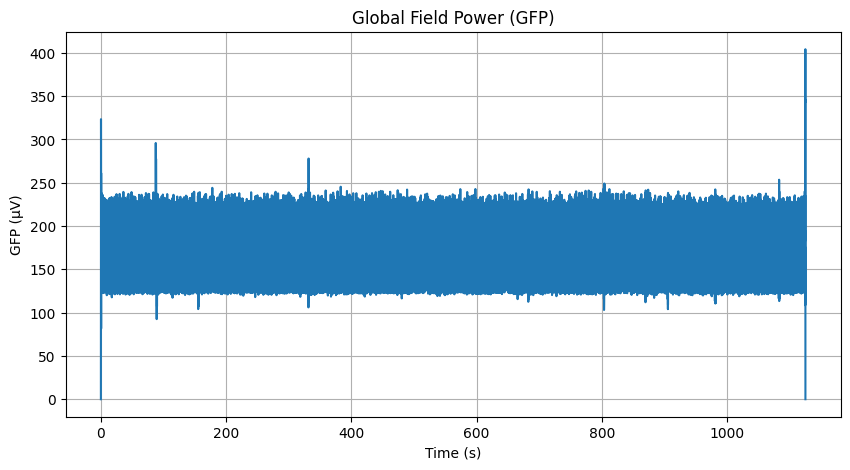

In [9]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load the EDF file
file_path = 'emotion_data/103918/103918.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)

# Filter the data (optional, but often useful)
raw.filter(l_freq=1., h_freq=40.)

# Get the data and times
time = len(raw)/100
data, times = raw[:, :]  # Get all channels and all times
#data, times = raw[:, :]  # Get all channels and all times
# Compute the GFP
gfp = np.std(data, axis=0)

# Plot the GFP
plt.figure(figsize=(10, 5))
plt.plot(times, gfp)
plt.title('Global Field Power (GFP)')
plt.xlabel('Time (s)')
plt.ylabel('GFP (μV)')
plt.grid()
plt.show()
